#### Goal : From a given image extract a Region of Interest, and compose it on a different background image

In [37]:
# standard setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

# useful helper function
from helpers import imshow

## Load original image

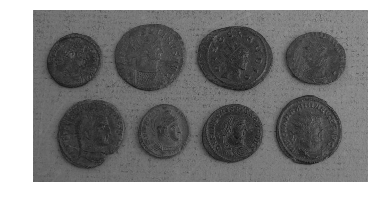

In [32]:
# load and display an image
orig_img = cv2.imread('coins-bw.jpg')
imshow(orig_img)

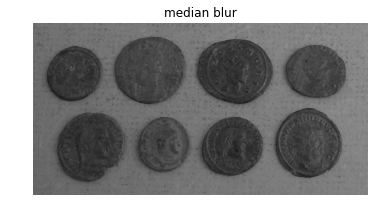

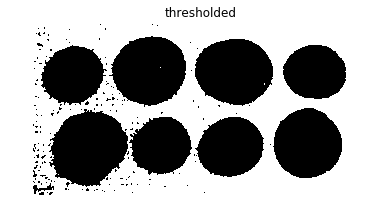

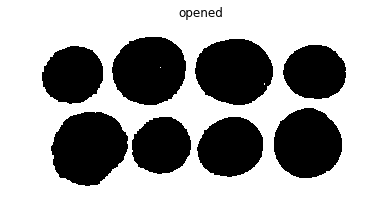

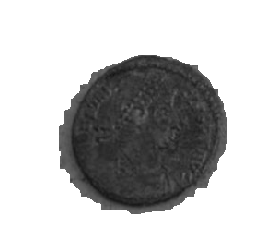

In [33]:
# reduce noise
processed = cv2.medianBlur(orig_img,5)
imshow(processed, 'median blur')

# threshold
ret, processed = cv2.threshold(processed, 100, 255, cv2.THRESH_BINARY)
imshow(processed, 'thresholded')

# remove noise
kernel = np.ones((3,3),np.uint8)
processed = cv2.morphologyEx(processed, cv2.MORPH_CLOSE, kernel, iterations = 5)
imshow(processed, 'opened')

# Extract region of interest
processed = cv2.add(processed, orig_img)
roi = processed[: len(processed)// 2, :, :]
roi = roi[20:, : 230, :]
imshow(roi)
single_coin_image = roi

## Load the new background image

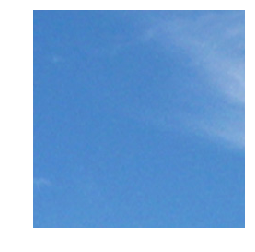

In [34]:
bg_img = cv2.imread('background_image.jpg')
bg_img = bg_img[:len(roi), :len(roi[0]), :]
imshow(bg_img)

## Compose the 2 images

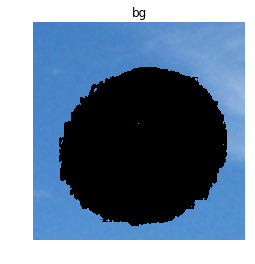

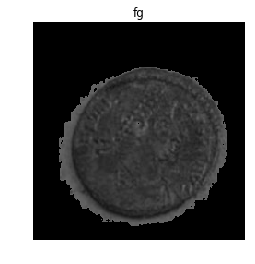

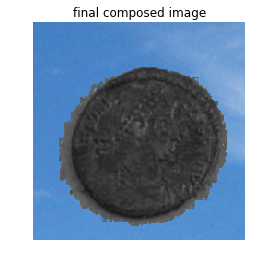

In [35]:
ret, mask = cv2.threshold(single_coin_image, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
bg = cv2.bitwise_and(bg_img, mask)
imshow(bg, 'background')
fg = cv2.bitwise_and(single_coin_image, mask_inv)
imshow(fg, 'foreground')
processed = cv2.add(bg, fg)
imshow(processed, 'final composed image')